In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# About my dataset
## Background
What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.
## Source
This dataset comes from kaggle, you can access it here: https://www.kaggle.com/rounakbanik/the-movies-dataset
## Questions I have for my dataset
1. How has the genre changed over time?
2. What are the objective factors that affect film income?

### 1. Import Data

In [3]:
# Load the data into pandas dataframe
import pandas as pd
credits_file='/content/drive/MyDrive/archive/tmdb_5000_credits.csv'
movies_file='/content/drive/MyDrive/archive/tmdb_5000_movies.csv'
credits = pd.read_csv(credits_file)
movies = pd.read_csv(movies_file)

In [4]:
# pd.describe()
credits.describe(), movies.describe()

(            movie_id
 count    4803.000000
 mean    57165.484281
 std     88694.614033
 min         5.000000
 25%      9014.500000
 50%     14629.000000
 75%     58610.500000
 max    459488.000000,
              budget             id   popularity       revenue      runtime  \
 count  4.803000e+03    4803.000000  4803.000000  4.803000e+03  4801.000000   
 mean   2.904504e+07   57165.484281    21.492301  8.226064e+07   106.875859   
 std    4.072239e+07   88694.614033    31.816650  1.628571e+08    22.611935   
 min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
 25%    7.900000e+05    9014.500000     4.668070  0.000000e+00    94.000000   
 50%    1.500000e+07   14629.000000    12.921594  1.917000e+07   103.000000   
 75%    4.000000e+07   58610.500000    28.313505  9.291719e+07   118.000000   
 max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   
 
        vote_average    vote_count  
 count   4803.000000   4803.000000  
 mean       6.

## 2. Data cleaning

In [5]:
# Merge these two datasets and take a look
fulldf = pd.concat([credits,movies],axis=1)
fulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   id                    4803 non-null   int64  
 8   keywords              4803 non-null   object 
 9   original_language     4803 non-null   object 
 10  original_title        4803 non-null   object 
 11  overview              4800 non-null   object 
 12  popularity            4803 non-null   float64
 13  production_companies  4803 non-null   object 
 14  production_countries  4803 non-null   object 
 15  release_date         

In [6]:
# Select subsets
moviesdf = fulldf[['original_title','crew','release_date','genres','keywords','production_companies',
                   'production_countries','revenue','budget','runtime','vote_average']]
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        4803 non-null   object 
 1   crew                  4803 non-null   object 
 2   release_date          4802 non-null   object 
 3   genres                4803 non-null   object 
 4   keywords              4803 non-null   object 
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   revenue               4803 non-null   int64  
 8   budget                4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  vote_average          4803 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 412.9+ KB


In [7]:
# Add column 'profit'
moviesdf['profit'] = moviesdf['revenue'] - moviesdf['budget']
moviesdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,7.2,2550965087
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,6.9,661000000
2,Spectre,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,245000000,148.0,6.3,635674609
3,The Dark Knight Rises,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,250000000,165.0,7.6,834939099
4,John Carter,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,260000000,132.0,6.1,24139100


In [8]:
# Missing values handling(release_date)
release_date_null = moviesdf['release_date'].isnull()
moviesdf.loc[release_date_null,:]
moviesdf['release_date'] = movies['release_date'].fillna('2014-06-01')
moviesdf['release_date'] = pd.to_datetime(moviesdf['release_date'],format='%Y-%m-%d')
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   original_title        4803 non-null   object        
 1   crew                  4803 non-null   object        
 2   release_date          4803 non-null   datetime64[ns]
 3   genres                4803 non-null   object        
 4   keywords              4803 non-null   object        
 5   production_companies  4803 non-null   object        
 6   production_countries  4803 non-null   object        
 7   revenue               4803 non-null   int64         
 8   budget                4803 non-null   int64         
 9   runtime               4801 non-null   float64       
 10  vote_average          4803 non-null   float64       
 11  profit                4803 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 450.4+ K

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
# Missing values handling(runtime)
runtime_date_null = moviesdf['runtime'].isnull()
moviesdf.loc[runtime_date_null,:]
values1 = {'runtime':98.0}
values2 = {'runtime':81.0}
moviesdf.fillna(value=values1,limit = 1,inplace = True)
moviesdf.fillna(value=values2,limit = 1,inplace = True)
moviesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   original_title        4803 non-null   object        
 1   crew                  4803 non-null   object        
 2   release_date          4803 non-null   datetime64[ns]
 3   genres                4803 non-null   object        
 4   keywords              4803 non-null   object        
 5   production_companies  4803 non-null   object        
 6   production_countries  4803 non-null   object        
 7   revenue               4803 non-null   int64         
 8   budget                4803 non-null   int64         
 9   runtime               4803 non-null   float64       
 10  vote_average          4803 non-null   float64       
 11  profit                4803 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 450.4+ K

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## 3. Convert data type

In [10]:
# Deal with genres
import json
moviesdf['genres'] = moviesdf['genres'].apply(json.loads)
# Decode json data
def decode(column):
    z = []
    for i in column:
        z.append(i['name'])
    return ' '.join(z)
moviesdf['genres'] = moviesdf['genres'].apply(decode)
moviesdf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,original_title,crew,release_date,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,Action Adventure Fantasy Science Fiction,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,7.2,2550965087
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,Adventure Fantasy Action,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,6.9,661000000
2,Spectre,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,Action Adventure Crime,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,245000000,148.0,6.3,635674609
3,The Dark Knight Rises,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,Action Crime Drama Thriller,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,250000000,165.0,7.6,834939099
4,John Carter,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,Action Adventure Science Fiction,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,260000000,132.0,6.1,24139100


In [11]:
# Build the genres list, extract the type of the movie
genres_list = set()
for i in moviesdf['genres'].str.split(' '):
    genres_list = set().union(i,genres_list)
    genres_list = list(genres_list)
    genres_list
genres_list.remove('')

In [12]:
# Deal with the release_date column
# Keep the year data
moviesdf['release_date'] = pd.to_datetime(moviesdf['release_date']).dt.year
columns = {'release_date':'year'}
moviesdf.rename(columns=columns,inplace=True)
moviesdf['year'].apply(int).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


0    2009
1    2007
2    2015
3    2012
4    2012
Name: year, dtype: int64

## 4. Shortcut of the data

In [40]:
list(moviesdf)

['original_title',
 'crew',
 'year',
 'genres',
 'keywords',
 'production_companies',
 'production_countries',
 'revenue',
 'budget',
 'runtime',
 'vote_average',
 'profit',
 'Crime',
 'Science',
 'Action',
 'Family',
 'Mystery',
 'Adventure',
 'Comedy',
 'Music',
 'Documentary',
 'War',
 'Animation',
 'Fantasy',
 'Movie',
 'Romance',
 'TV',
 'Western',
 'Thriller',
 'Fiction',
 'Horror',
 'Foreign',
 'History',
 'Drama']

In [41]:
moviesdf.index

RangeIndex(start=0, stop=4803, step=1)

In [13]:
moviesdf.head()

,original_title,crew,year,genres,keywords,production_companies,production_countries,revenue,budget,runtime,vote_average,profit
0,Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,Action Adventure Fantasy Science Fiction,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,237000000,162.0,7.2,2550965087
1,Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,Adventure Fantasy Action,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,300000000,169.0,6.9,661000000
2,Spectre,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015,Action Adventure Crime,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,245000000,148.0,6.3,635674609
3,The Dark Knight Rises,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012,Action Crime Drama Thriller,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,250000000,165.0,7.6,834939099
4,John Carter,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012,Action Adventure Science Fiction,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,260000000,132.0,6.1,24139100


## 5. Explore the data

### (1) How has the genre changed over time?

In [14]:
for genre in genres_list:
    moviesdf[genre] = moviesdf['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
genre_year = moviesdf.loc[:,genres_list]

In [26]:
# Get the number of each type of films every year group by year
import numpy as np
genresdf = pd.pivot_table(genre_year, index=['year'], aggfunc=np.sum)
genresdf.tail() 

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,...,Horror,Movie,Music,Mystery,Romance,Science,TV,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,,
2013,56,36,17,71,37,10,110,22,21,27,...,25,2,12,5,25,27,2,53,3,1
2014,54,37,14,62,27,7,110,23,16,26,...,21,0,9,15,24,26,0,66,10,3
2015,46,35,13,52,26,7,95,17,10,28,...,33,0,8,20,23,28,0,67,2,7
2016,39,23,4,26,10,0,37,9,13,11,...,20,0,1,6,9,11,0,27,3,1
2017,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Sum up the amount of films of each genre
genresdfSum = genresdf.sum(axis=0).sort_values(ascending=False)
genresdfSum

Drama          2297
Comedy         1722
Thriller       1274
Action         1154
Romance         894
Adventure       790
Crime           696
Fiction         535
Science         535
Horror          519
Family          513
Fantasy         424
Mystery         348
Animation       234
History         197
Music           185
War             144
Documentary     110
Western          82
Foreign          34
Movie             8
TV                8
dtype: int64

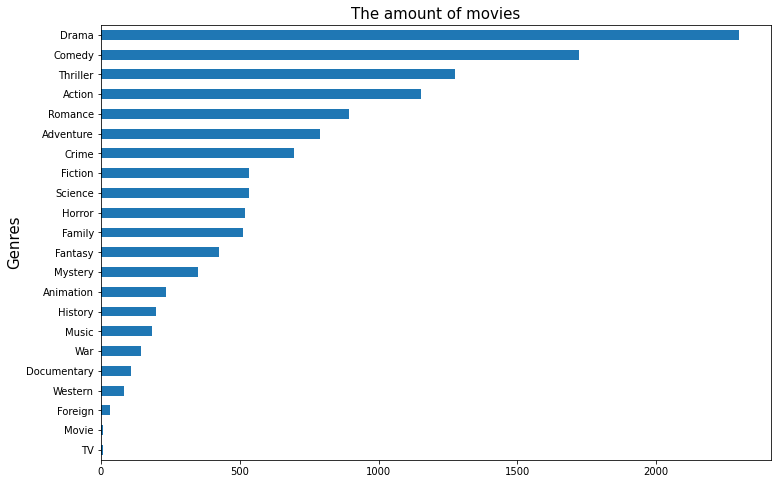

In [28]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,8))
ax1 = plt.subplot(111)
rects = genresdfSum.sort_values(ascending=True).plot(kind='barh',label='genres')
plt.title('The amount of movies',fontsize=15)
plt.ylabel('Genres',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Portion of each genre')

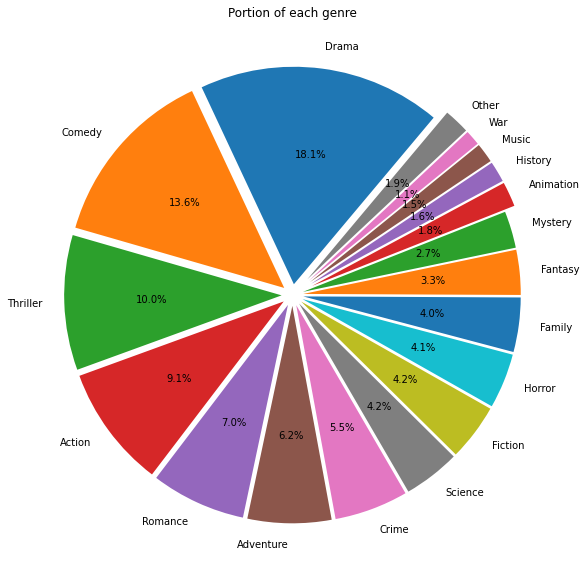

In [ ]:
genres_pie = genresdfSum / genresdfSum.sum()
# Set a genre named 'other': the portion < 1%, put all of them into 'other'
others = 0.01
genres_pie_otr = genres_pie[genres_pie >= others]
genres_pie_otr['Other'] = genres_pie[genres_pie < others].sum()
explode = (genres_pie_otr <= 0.02) / 20 + 0.05 
genres_pie_otr.plot(kind='pie',label='',startangle=50,shadow=False,
                   figsize=(10,10),autopct='%1.1f%%',explode=explode)
plt.title('Portion of each genre')

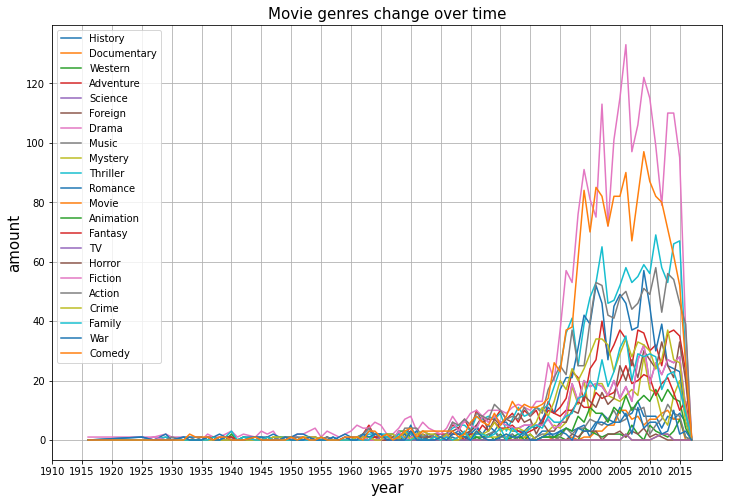

In [ ]:
# Analyze how genre has changed over time
plt.figure(figsize=(12,8))
plt.plot(genresdf,label=genresdf.columns)
plt.xticks(range(1910,2018,5))
plt.legend(genresdf)
plt.title('Movie genres change over time',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.ylabel('amount',fontsize=15)
plt.grid(True)
plt.show()

1. From the result above, we can see that drama movies account for 18.9% of all movie types, followed by comedy movies accounting for 14.2%.
2. In all types, the top 5 genres are Drama, Comedy, Thriller, Action and Romance.
3. As time went by, all movie genres showed a trend of growth, especially after 1992, all of them had a rapid growth, among which Drama and Comedy showed the fastest growth and are still the most popular movie genres nowadays.

### (2) The relation between genre and profit

In [34]:
# Set genre as index
mean_genre_profit = pd.DataFrame(index=genres_list)
# Calculate average profit of each genre
newarray = []
for genre in genres_list:
    newarray.append(moviesdf.groupby(genre,as_index=True)['profit'].mean())
newarray2 = []
for i in range(len(genres_list)):
    newarray2.append(newarray[i][1])
mean_genre_profit['mean_profit'] = newarray2
mean_genre_profit.head()

,mean_profit
Crime,3.830085e+07
Science,1.005910e+08
Action,8.970235e+07
Family,1.116260e+08
Mystery,4.755644e+07


<Figure size 864x576 with 0 Axes>

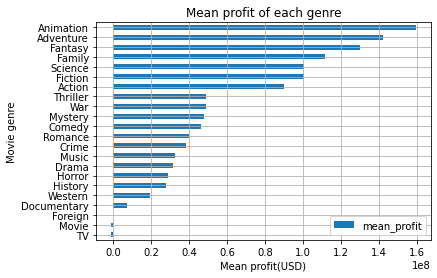

In [35]:
plt.figure(figsize=(12,8))
mean_genre_profit.sort_values(by='mean_profit',ascending=True).plot(kind='barh')
plt.title('Mean profit of each genre')
plt.xlabel('Mean profit(USD)')
plt.ylabel('Movie genre')
plt.grid(True)
plt.show()

1. As shown in the graph, shooting Animation, Adventure and Fantasy has the most profit. Meanwhile shooting Foreign, TV or Movie might face the risk of losing money.

### (3) The relation between runtime and revenue, runtime and vote

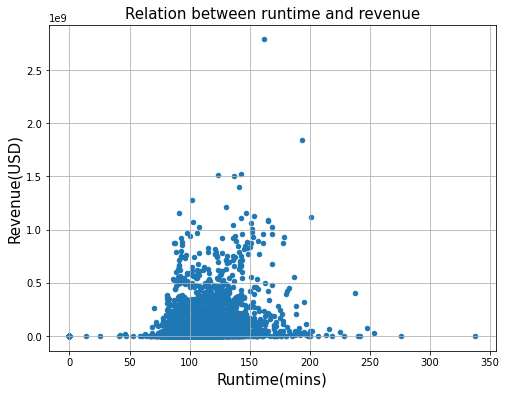

In [36]:
# Runtime and revenue
moviesdf.plot(kind='scatter', x='runtime', y='revenue', figsize=(8, 6))
plt.title('Relation between runtime and revenue',fontsize=15)
plt.xlabel('Runtime(mins)',fontsize=15)
plt.ylabel('Revenue(USD)',fontsize=15)
plt.grid(True)
plt.show()

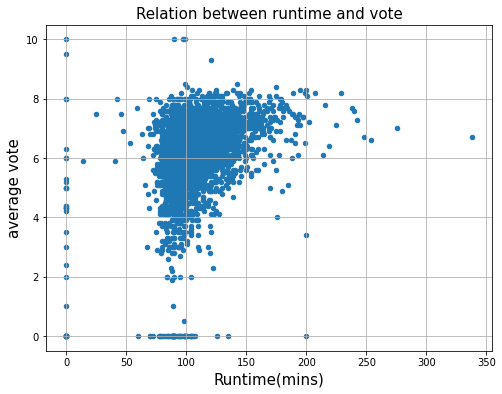

In [37]:
# Runtime and vote
moviesdf.plot(kind='scatter', x='runtime', y='vote_average', figsize=(8, 6))
plt.title('Relation between runtime and vote',fontsize=15)
plt.xlabel('Runtime(mins)',fontsize=15)
plt.ylabel('average vote',fontsize=15)
plt.grid(True)
plt.show()

1. In order to gain high box office and good word of mouth, the film should be kept within 90~150 minutes.